In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
sns.set_style("whitegrid")

In [4]:
from tabgen.definitions import *
from tabgen.modelling import *
from tabgen.evaluation import DummyFrettingEvaluator

# Distribution of Fretting Possibilities

In [14]:
evaluator = DummyFrettingEvaluator()

In [10]:
configs = {
    'standard 24 frets': StringConfig(num_frets=24, string_pitches=[40, 45, 50, 55, 59, 64]),
    'drop D 24 frets': StringConfig(num_frets=24, string_pitches=[38, 45, 50, 55, 59, 64]),
    'standard 20 frets': StringConfig(num_frets=20, string_pitches=[40, 45, 50, 55, 59, 64]),
}

In [11]:
fretting_counts = {}

for name, config in configs.items():
    fretting_counts[name] = {}
    
    for pitch in range(config.min_pitch, config.max_pitch + 1):
        count = len(Pitch(pitch).get_note_frettings(config))
        if count in fretting_counts[name]:
            fretting_counts[name][count] += 1
        else:
            fretting_counts[name][count] = 1

In [19]:
distributions = pd.DataFrame(fretting_counts).fillna(0).astype(pd.np.int32).T
distributions

,1,2,3,4,5,6
drop D 24 frets,12,9,10,10,10,0
standard 20 frets,10,9,10,12,4,0
standard 24 frets,10,9,10,9,10,1


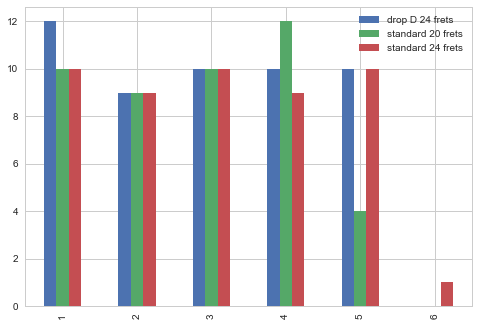

In [12]:
distributions.T.plot(kind='bar')
plt.show()

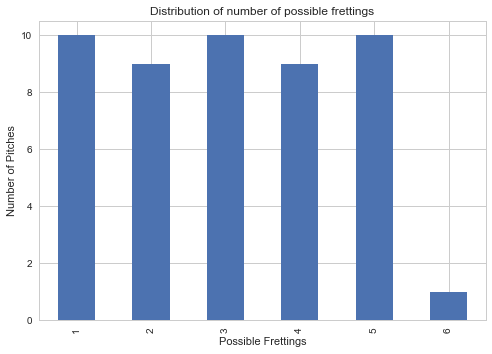

In [13]:
distributions.loc['standard 24 frets'].plot(kind='bar')
plt.title('Distribution of number of possible frettings')
plt.xlabel('Possible Frettings')
plt.ylabel('Number of Pitches')
plt.show()

In [20]:
chord_fretting_counts = {}

for name, config in configs.items():
    chord_fretting_counts[name] = {}
    
    for pitch1 in range(config.min_pitch, config.max_pitch + 1):
        for pitch2 in range(config.min_pitch, config.max_pitch + 1):
            try:
                count = len(Chord(1.0,[pitch1, pitch2], False).get_chord_frettings(config, evaluator))
                if count in chord_fretting_counts[name]:
                    chord_fretting_counts[name][count] += 1
                else:
                    chord_fretting_counts[name][count] = 1
            except NoValidFrettingException:
                pass

E:\Dokumente\MSc Data Science\_MSC\dev\tabgen\tabgen\modelling.py:456: UserWarning: Pre-filtering removed all frettings! Defaulting to all frettings.
  warnings.warn('Pre-filtering removed all frettings! Defaulting to all frettings.')


In [21]:
for key in range(max(chord_fretting_counts['standard 24 frets'].keys())):
    if key not in chord_fretting_counts['standard 24 frets']:
        chord_fretting_counts['standard 24 frets'][key] = 0

In [22]:
chord_distributions = pd.DataFrame(chord_fretting_counts).fillna(0).astype(pd.np.int32).T
chord_distributions

,0,1,2,3,4,5,6,7,8,9,10,11,12
drop D 24 frets,0,642,572,502,296,244,143,90,28,6,0,0,4
standard 20 frets,0,512,410,424,234,190,111,68,20,2,0,0,4
standard 24 frets,0,552,414,476,310,260,173,106,30,26,0,0,4


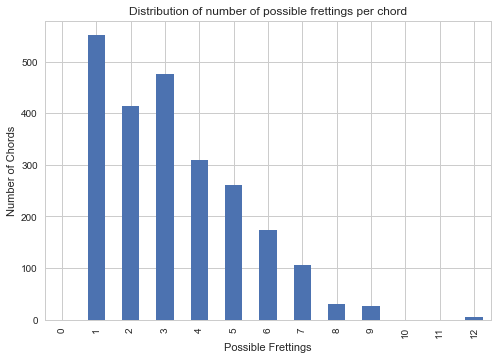

In [23]:
chord_distributions.loc['standard 24 frets'].plot(kind='bar')
plt.title('Distribution of number of possible frettings per chord')
plt.xlabel('Possible Frettings')
plt.ylabel('Number of Chords')
plt.show()

In [24]:
max(chord_fretting_counts['standard 24 frets'].keys())

12

# Sigmoid graphic for NN info

In [25]:
sigmoid = lambda x: 1.0 / (1 + math.exp(-x))

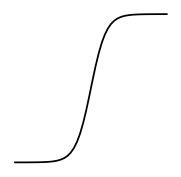

In [26]:
rr = np.linspace(-10,10)
plt.figure(figsize=(3,3))
plt.plot(rr, [sigmoid(r) for r in rr], c='k')
plt.xticks([])
plt.yticks([])
plt.box()
plt.show()

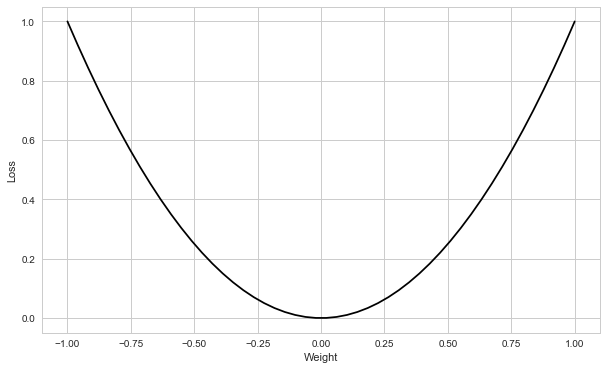

In [39]:
rr = np.linspace(-10,10)/10
plt.figure(figsize=(10,6))
plt.plot(rr, [r ** 2 for r in rr], c='k')
plt.xlabel('Weight')
plt.ylabel('Loss')
# plt.xlim((-0.75,0.75))
# plt.ylim((0, 0.6))
# plt.plot(0.6, 0.6**2, 'go', markersize=12)
plt.show()

# Plot the accuracies of models

c:\users\elias\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


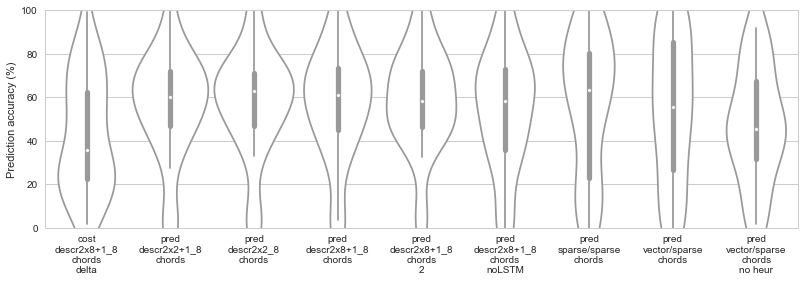

In [113]:
# old measures
model_accuracies = pd.DataFrame({
    # plain
    # 'pred\ndescr2x8_8\nchords': [57.120743034055735, 68.39622641509435, 64.95726495726495, 84.27672955974843, 32.07070707070707, 44.303797468354425, 71.72827172827174, 73.29729729729729, 72.09302325581395, 72.09302325581395, 78.89009793253537, 43.75, 0.1277139208173691, 72.66922094508301, 56.80628272251309, 3.488372093023256, 46.846846846846844, 46.846846846846844, 2.046384720327422, 1.7266187050359711, 68.75800256081946, 52.21238938053098, 76.25, 57.09219858156028, 36.342042755344416, 31.963470319634702, 41.74174174174174, 77.58620689655173, 93.76344086021506, 71.11111111111111, 67.04545454545455, 75.0, 54.0, 54.0, 98.94551845342706, 49.42528735632184, 82.7485380116959, 50.29585798816568, 71.25984251968504],
    'pred\ndescr2x2_8\nchords': [54.179566563467496, 76.88679245283019, 54.27350427350427, 61.0062893081761, 51.515151515151516, 36.708860759493675, 69.33066933066932, 71.56756756756756, 62.7906976744186, 62.7906976744186, 75.95212187159956, 43.99038461538461, 100.0, 4.597701149425287, 46.596858638743456, 3.488372093023256, 63.96396396396396, 63.96396396396396, 1.9099590723055935, 1.5827338129496402, 80.79385403329066, 47.1976401179941, 70.83333333333334, 46.09929078014184, 36.81710213776722, 32.87671232876712, 71.17117117117117, 75.86206896551724, 72.47311827956989, 71.11111111111111, 68.18181818181817, 100.0, 64.66666666666666, 64.66666666666666, 98.94551845342706, 49.42528735632184, 62.28070175438597, 56.50887573964497, 55.51181102362205],
    'pred\ndescr2x2+1_8\nchords': [56.656346749226, 49.056603773584904, 60.04273504273504, 74.21383647798741, 59.09090909090909, 57.59493670886076, 64.73526473526474, 69.2972972972973, 62.7906976744186, 62.7906976744186, 75.73449401523395, 35.57692307692308, 0.38314176245210724, 72.66922094508301, 46.33507853403142, 3.488372093023256, 47.74774774774775, 47.74774774774775, 1.7735334242837655, 1.4388489208633095, 27.528809218950062, 61.6519174041298, 65.0, 46.09929078014184, 47.26840855106889, 32.87671232876712, 51.35135135135135, 77.58620689655173, 85.80645161290322, 40.0, 65.9090909090909, 100.0, 76.66666666666667, 76.66666666666667, 98.94551845342706, 58.620689655172406, 76.90058479532163, 69.23076923076923, 71.25984251968504],
    'pred\ndescr2x8+1_8\nchords': [54.79876160990712, 54.24528301886793, 60.89743589743589, 75.47169811320755, 40.4040404040404, 50.0, 68.43156843156844, 69.72972972972973, 65.89147286821705, 65.89147286821705, 77.80195865070729, 43.269230769230774, 0.38314176245210724, 84.2911877394636, 46.596858638743456, 3.488372093023256, 31.53153153153153, 31.53153153153153, 1.7735334242837655, 1.4388489208633095, 51.21638924455826, 53.687315634218294, 65.20833333333333, 58.86524822695035, 36.81710213776722, 31.963470319634702, 50.45045045045045, 77.58620689655173, 89.24731182795699, 71.11111111111111, 67.04545454545455, 100.0, 75.33333333333333, 75.33333333333333, 98.94551845342706, 49.42528735632184, 93.85964912280701, 61.24260355029586, 70.47244094488188],
    'pred\nvector/sparse\nchords': [56.811145510835914, 53.301886792452834, 21.367521367521366, 35.84905660377358, 31.565656565656564, 43.037974683544306, 89.31068931068931, 81.62162162162161, 70.54263565891473, 70.54263565891473, 89.44504896626768, 38.94230769230769, 99.87228607918263, 4.597701149425287, 20.418848167539267, 0.0, 9.90990990990991, 9.90990990990991, 1.7735334242837655, 1.5827338129496402, 94.36619718309859, 48.96755162241888, 59.791666666666664, 0.0, 54.63182897862233, 100.0, 91.8918918918919, 75.86206896551724, 68.60215053763442, 68.88888888888889, 37.5, 100.0, 93.83333333333333, 93.83333333333333, 98.94551845342706, 19.54022988505747, 55.26315789473685, 49.40828402366864, 64.56692913385827],
    'pred\nvector/sparse\nchords\nno heur' : [52.78637770897833, 37.735849056603776, 35.8974358974359, 58.80503144654088, 15.151515151515152, 44.936708860759495, 73.72627372627373, 72.32432432432432, 72.09302325581395, 72.09302325581395, 62.35038084874864, 44.230769230769226, 20.434227330779056, 4.725415070242656, 46.596858638743456, 1.744186046511628, 31.53153153153153, 31.53153153153153, 1.6371077762619373, 1.4388489208633095, 12.163892445582587, 50.442477876106196, 54.79166666666667, 48.226950354609926, 62.23277909738717, 32.87671232876712, 88.28828828828829, 79.3103448275862, 18.70967741935484, 28.888888888888886, 45.45454545454545, 91.66666666666666, 90.0, 90.0, 82.77680140597539, 40.229885057471265, 42.98245614035088, 42.60355029585799, 48.031496062992126],
    'pred\nsparse/sparse\nchords': [58.82352941176471, 24.056603773584907, 51.06837606837607, 81.13207547169812, 64.14141414141415, 51.89873417721519, 77.22277722277722, 82.05405405405405, 72.09302325581395, 72.09302325581395, 81.39281828073993, 50.72115384615385, 76.62835249042146, 21.58365261813538, 11.518324607329843, 0.0, 20.72072072072072, 20.72072072072072, 1.6371077762619373, 1.4388489208633095, 100.0, 75.51622418879056, 52.916666666666664, 0.0, 60.09501187648456, 12.32876712328767, 93.09309309309309, 79.3103448275862, 90.32258064516128, 15.555555555555555, 75.0, 100.0, 93.83333333333333, 93.83333333333333, 98.94551845342706, 63.2183908045977, 71.9298245614035, 44.08284023668639, 59.055118110236215],
    'pred\ndescr2x8+1_8\nchords\nnoLSTM': [58.04953560371517, 2.358490566037736, 48.504273504273506, 72.32704402515722, 37.37373737373738, 34.177215189873415, 67.63236763236763, 69.83783783783784, 62.7906976744186, 62.7906976744186, 73.12295973884657, 43.75, 100.0, 8.301404853128991, 66.2303664921466, 0.0, 31.53153153153153, 31.53153153153153, 1.7735334242837655, 1.4388489208633095, 53.39308578745199, 49.557522123893804, 48.541666666666664, 64.8936170212766, 66.5083135391924, 33.33333333333333, 66.06606606606607, 77.58620689655173, 76.77419354838709, 28.888888888888886, 57.95454545454546, 100.0, 76.66666666666667, 76.66666666666667, 98.94551845342706, 78.16091954022988, 90.35087719298247, 40.23668639053255, 44.881889763779526],
    'pred\ndescr2x8+1_8\nchords\n2': [49.07120743034056, 49.056603773584904, 46.15384615384615, 72.95597484276729, 71.46464646464646, 51.26582278481012, 67.13286713286713, 69.83783783783784, 62.7906976744186, 62.7906976744186, 79.97823721436343, 37.980769230769226, 100.0, 6.513409961685824, 46.596858638743456, 47.093023255813954, 45.94594594594595, 45.94594594594595, 2.728512960436562, 2.446043165467626, 32.52240717029449, 70.20648967551622, 51.66666666666667, 48.93617021276596, 35.62945368171022, 43.83561643835616, 64.56456456456456, 77.58620689655173, 81.29032258064515, 57.77777777777777, 68.18181818181817, 100.0, 78.5, 78.5, 98.94551845342706, 70.11494252873564, 84.7953216374269, 49.40828402366864, 58.26771653543307],
    
    # 'pred\nall\nchords'
    
    # delta
    # 'pred\nall\nchords\ndelta'
    # 'pred\ndescr2x8+1_8\nchords\ndelta'
    # 'pred\nvector/sparse\nchords\ndelta'
    # 'pred\nsparse/sparse\nchords\ndelta'
    
    # sequential
    # 'pred\nall\nsequential'
    # 'pred\ndescr2x2_2\nsequential'
    # 'pred\nvector/sparse\nsequential'
#     'pred\nsparse/sparse\nsequential': [52.706843718079675, 34.86005089058524, 43.232044198895025, 91.50943396226415, 27.51842751842752, 56.830601092896174, 80.11317704122878, 81.95038494439693, 72.09302325581395, 72.09302325581395, 81.06637649619152, 52.483443708609265, 21.22552116234997, 21.58365261813538, 82.72251308900523, 100.0, 38.73873873873874, 38.73873873873874, 68.14159292035397, 57.91666666666667, 0.0, 73.32549941245593, 33.33333333333333, 87.16744913928012, 79.3103448275862, 92.90322580645162, 46.666666666666664, 48.818897637795274, 100.0, 95.04322766570606, 95.04322766570606, 98.94551845342706, 73.88059701492537, 38.30409356725146, 34.15233415233415, 55.90277777777778],
    
    # delta sequential
    # 'pred\nall\nsequential\ndelta'
#     'pred\ndescr1x1_1\nsequential\ndelta': [72.35246564268391, 75.44910179640718, 72.09302325581395, 72.09302325581395, 75.29923830250273, 37.086092715231786, 2.2109917877447884, 4.597701149425287, 3.926701570680628, 22.093023255813954, 44.14414414414414, 44.14414414414414, 6.1946902654867255, 0.4166666666666667, 48.226950354609926, 39.365452408930665, 21.91780821917808, 74.17840375586854, 68.96551724137932, 4.946236559139785, 64.44444444444444, 49.60629921259843, 100.0, 81.21037463976946, 81.21037463976946, 98.94551845342706, 27.611940298507463, 48.24561403508772, 33.169533169533175, 41.31944444444444],
    # 'pred\nvector/sparse\nsequential\ndelta'
    # 'pred\nsparse/sparse\nsequential\ndelta'
    
    # === cost-based models
#     'cost\nall\nchords': [30.185758513931887, 4.245283018867925, 30.982905982905983, 80.50314465408806, 36.11111111111111, 32.278481012658226, 75.82417582417582, 69.08108108108108, 78.29457364341084, 78.29457364341084, 79.5429815016322, 24.519230769230766, 18.39080459770115, 66.66666666666666, 48.69109947643979, 57.55813953488372, 21.62162162162162, 21.62162162162162, 2.728512960436562, 2.446043165467626, 62.355953905249685, 35.39823008849557, 28.125, 42.90780141843972, 25.890736342042754, 21.91780821917808, 41.44144144144144, 75.86206896551724, 76.98924731182795, 40.0, 50.0, 72.61904761904762, 61.5, 61.5, 98.94551845342706, 43.67816091954023, 29.82456140350877, 32.544378698224854, 51.181102362204726],
#     'cost\ndescr2x8+1_8\nchords': [18.575851393188856, 66.98113207547169, 13.88888888888889, 41.19496855345912, 9.595959595959595, 43.037974683544306, 57.642357642357645, 68.97297297297297, 62.7906976744186, 62.7906976744186, 74.10228509249184, 18.269230769230766, 0.0, 6.385696040868455, 11.2565445026178, 65.11627906976744, 24.324324324324326, 24.324324324324326, 4.774897680763983, 3.741007194244604, 26.504481434058896, 48.67256637168141, 25.0, 26.595744680851062, 40.142517814726844, 32.87671232876712, 69.36936936936937, 77.58620689655173, 84.08602150537634, 62.22222222222222, 27.27272727272727, 100.0, 56.49999999999999, 56.49999999999999, 76.97715289982425, 22.988505747126435, 28.07017543859649, 28.402366863905325, 50.0],
#     'cost\ndescr2x8+1_8\nchords\nno heur': [27.708978328173373, 58.9622641509434, 19.65811965811966, 66.98113207547169, 21.464646464646464, 62.0253164556962, 61.038961038961034, 61.62162162162163, 62.7906976744186, 62.7906976744186, 75.40805223068553, 8.173076923076923, 0.0, 6.385696040868455, 44.50261780104712, 0.0, 30.630630630630627, 30.630630630630627, 7.094133697135062, 6.618705035971223, 8.322663252240718, 57.817109144542776, 21.041666666666668, 42.5531914893617, 51.06888361045131, 22.37442922374429, 37.53753753753754, 79.3103448275862, 78.27956989247312, 75.55555555555556, 35.22727272727273, 45.23809523809524, 25.166666666666664, 25.166666666666664, 82.77680140597539, 28.735632183908045, 55.26315789473685, 47.633136094674555, 53.937007874015755],
#     'cost\ndescr2x8+1_8\nchords\nLSTM': [36.84210526315789, 63.20754716981132, 64.52991452991454, 15.40880503144654, 12.121212121212121, 20.88607594936709, 70.32967032967034, 70.37837837837839, 76.74418604651163, 76.74418604651163, 61.915125136017416, 24.278846153846153, 0.0, 8.939974457215836, 5.49738219895288, 36.04651162790697, 36.03603603603604, 36.03603603603604, 3.547066848567531, 2.877697841726619, 37.38796414852753, 10.32448377581121, 15.625, 2.8368794326241136, 39.19239904988123, 54.794520547945204, 1.8018018018018018, 58.620689655172406, 32.043010752688176, 48.888888888888886, 25.0, 45.23809523809524, 23.833333333333336, 23.833333333333336, 86.11599297012302, 1.1494252873563218, 0.0, 33.72781065088758, 62.59842519685039],
    
#     'cost\nvector/sparse\nchords\nno heur': [26.006191950464398, 25.0, 17.094017094017094, 69.18238993710692, 50.505050505050505, 18.354430379746837, 64.33566433566433, 61.29729729729729, 67.44186046511628, 67.44186046511628, 83.02502720348205, 34.855769230769226, 17.24137931034483, 8.301404853128991, 26.96335078534031, 0.0, 41.44144144144144, 41.44144144144144, 51.56889495225102, 53.956834532374096, 92.44558258642766, 82.59587020648968, 32.29166666666667, 0.0, 43.705463182897866, 32.87671232876712, 64.26426426426426, 75.86206896551724, 78.06451612903226, 48.888888888888886, 44.31818181818182, 47.61904761904761, 27.0, 27.0, 98.94551845342706, 13.793103448275861, 49.122807017543856, 48.5207100591716, 53.14960629921261],
    # 'cost\nsparse/sparse\nchords'
        
    # delta
#     'cost\nall\nchords\ndelta'
#     'cost\ndescr2x8+1_8\nchords\ndelta': [32.972136222910216, 74.52830188679245, 25.427350427350426, 52.83018867924528, 15.909090909090908, 26.582278481012654, 74.92507492507492, 72.97297297297297, 59.68992248062015, 59.68992248062015, 78.23721436343853, 17.78846153846154, 1.532567049808429, 8.301404853128991, 25.654450261780106, 9.30232558139535, 12.612612612612612, 12.612612612612612, 24.556616643929058, 22.15827338129496, 33.93085787451985, 26.548672566371685, 3.958333333333333, 54.25531914893617, 56.294536817102134, 22.37442922374429, 65.46546546546547, 74.13793103448276, 40.0, 35.55555555555556, 25.0, 86.90476190476191, 79.83333333333333, 79.83333333333333, 98.94551845342706, 50.57471264367817, 58.77192982456141, 20.710059171597635, 43.30708661417323],
    # 'cost\nvector/sparse\nchords\ndelta'
    # 'cost\nsparse/sparse\nchords\ndelta'
    
    # sequential
    # 'cost\nall\nsequential'
#     'cost\ndescr1x1_1\nsequential': [24.310520939734424, 0.5089058524173028, 7.18232044198895, 2.515723270440252, 7.616707616707617, 28.96174863387978, 88.03556992724333, 82.72027373823782, 72.09302325581395, 72.09302325581395, 81.71926006528835, 4.470198675496689, 92.04042956411877, 4.597701149425287, 0.0, 64.53488372093024, 19.81981981981982, 19.81981981981982, 14.470108695652172, 13.48870056497175, 31.75416133162612, 25.958702064896755, 2.083333333333333, 42.5531914893617, 28.672150411280846, 0.0, 32.237871674491394, 70.6896551724138, 19.35483870967742, 35.55555555555556, 35.43307086614173, 100.0, 91.87319884726224, 91.87319884726224, 97.01230228471002, 38.80597014925373, 10.526315789473683, 10.073710073710075, 42.70833333333333],
#     'cost\nvector/sparse\nsequential': [33.40143003064352, 15.012722646310433, 18.093922651933703, 38.9937106918239, 18.42751842751843, 22.404371584699454, 81.56831042845593, 80.4961505560308, 67.44186046511628, 67.44186046511628, 79.76060935799782, 47.35099337748344, 79.97473152242578, 6.641123882503193, 28.79581151832461, 58.720930232558146, 13.513513513513514, 13.513513513513514, 57.52212389380531, 42.5, 17.375886524822697, 68.2726204465335, 32.87671232876712, 71.04851330203444, 82.75862068965517, 85.80645161290322, 35.55555555555556, 28.346456692913385, 80.0, 75.10086455331411, 75.10086455331411, 82.77680140597539, 49.25373134328358, 24.269005847953213, 45.7002457002457, 59.02777777777778],
    # 'cost\nsparse/sparse\nsequential'
    
    # delta 
    # 'cost\nall\nsequential\ndelta'
    # 'cost\ndescr1x1_1\nsequential\ndelta': [27.47701736465781, 52.16284987277354, 8.011049723756907, 56.289308176100626, 16.953316953316953, 23.497267759562842, 89.8949070331447, 76.732249786142, 74.03100775193798, 74.03100775193798, 74.64635473340587, 17.052980132450333, 100.0, 4.597701149425287, 26.17801047120419, 8.13953488372093, 14.414414414414415, 14.414414414414415, 4.129793510324483, 59.166666666666664, 32.97872340425532, 75.08813160987074, 31.963470319634702, 98.59154929577466, 63.793103448275865, 66.02150537634408, 35.55555555555556, 23.62204724409449, 100.0, 89.97118155619597, 89.97118155619597, 82.77680140597539, 30.597014925373134, 58.187134502923975, 35.62653562653563, 44.44444444444444],
    # 'cost\nvector/sparse\nsequential\ndelta'
    # 'cost\nsparse/sparse\nsequential\ndelta'
    
})
# model_accuracies.describe()


plt.figure(figsize=(model_accuracies.shape[1]*1.5,4))  
sns.violinplot(model_accuracies, color='w', width=0.95)
plt.plot()
plt.ylabel('Prediction accuracy (%)')
plt.ylim((0,100))
plt.show()

c:\users\elias\appdata\local\conda\conda\envs\tensorflow\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


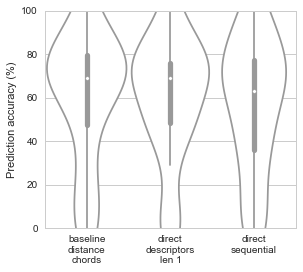

In [11]:
model_accuracies = pd.DataFrame({
#     'baseline\nrandom': [25.077399380804955, 23.58490566037736, 21.153846153846153, 39.308176100628934, 22.474747474747474, 29.746835443037973, 62.33766233766234, 64.54054054054053, 72.86821705426357, 77.13178294573643, 70.07616974972797, 21.153846153846153, 25.67049808429119, 71.9029374201788, 16.49214659685864, 22.674418604651162, 15.315315315315313, 17.117117117117118, 19.236016371077763, 35.25179856115108, 32.90653008962868, 26.548672566371685, 27.500000000000004, 16.666666666666664, 25.653206650831358, 39.26940639269406, 27.627627627627625, 79.3103448275862, 44.086021505376344, 37.77777777777778, 28.40909090909091, 60.71428571428571, 55.666666666666664, 46.833333333333336, 78.03163444639719, 12.643678160919542, 21.34502923976608, 30.473372781065088, 45.66929133858268],
#     'baseline\ndense\nchords': [31.57894736842105, 69.33962264150944, 48.29059829059829, 72.32704402515722, 82.07070707070707, 29.11392405063291, 59.540459540459544, 63.78378378378379, 61.240310077519375, 61.240310077519375, 71.27312295973884, 36.05769230769231, 0.0, 100.0, 1.832460732984293, 0.0, 9.90990990990991, 9.90990990990991, 6.2755798090040935, 6.330935251798561, 7.810499359795134, 94.98525073746312, 49.375, 0.0, 32.304038004750595, 100.0, 70.57057057057057, 75.86206896551724, 62.58064516129033, 68.88888888888889, 75.0, 100.0, 97.83333333333334, 97.83333333333334, 82.77680140597539, 72.41379310344827, 42.39766081871345, 83.4319526627219, 90.94488188976378],
    'baseline\ndistance\nchords': [52.78637770897833, 75.94339622641509, 25.64102564102564, 66.0377358490566, 79.04040404040404, 49.36708860759494, 67.33266733266733, 76.75675675675676, 81.3953488372093, 81.3953488372093, 71.9260065288357, 31.971153846153843, 0.0, 100.0, 7.853403141361256, 0.0, 9.90990990990991, 9.90990990990991, 66.84856753069577, 70.07194244604317, 24.583866837387962, 74.92625368731564, 45.208333333333336, 0.0, 56.76959619952494, 100.0, 91.29129129129129, 72.41379310344827, 63.87096774193548, 68.88888888888889, 75.0, 100.0, 80.5, 80.5, 73.81370826010544, 58.620689655172406, 80.7017543859649, 66.27218934911244, 84.64566929133859],
#     'baseline\ndistance\nsequential': [52.80898876404494, 61.57760814249363, 26.933701657458563, 55.0314465408805, 35.62653562653563, 50.27322404371585, 61.43896523848019, 66.89478186484175, 81.3953488372093, 81.3953488372093, 72.57889009793253, 43.211920529801326, 2.8427037271004423, 100.0, 50.523560209424076, 3.488372093023256, 8.108108108108109, 8.108108108108109, 16.383412644459554, 16.807909604519775, 20.6145966709347, 65.48672566371681, 1.25, 0.0, 28.672150411280846, 100.0, 53.677621283255085, 74.13793103448276, 53.5483870967742, 51.11111111111111, 22.04724409448819, 100.0, 99.65417867435158, 99.65417867435158, 73.81370826010544, 16.417910447761194, 62.28070175438597, 66.83046683046683, 78.47222222222221],
#     'baseline\nprobability\nlookup': [22.778345250255363, 32.31552162849873, 26.519337016574585, 40.25157232704403, 45.45454545454545, 21.311475409836063, 65.48100242522231, 65.01283147989734, 67.44186046511628, 67.44186046511628, 66.48531011969531, 10.264900662251655, 82.94377763739735, 10.727969348659004, 7.591623036649215, 25.0, 39.63963963963964, 39.63963963963964, 4.486743711760707, 4.378531073446328, 60.05121638924456, 38.05309734513274, 24.583333333333332, 0.0, 17.62632197414806, 89.04109589041096, 50.39123630672926, 75.86206896551724, 45.16129032258064, 48.888888888888886, 43.30708661417323, 80.43478260869566, 75.27377521613833, 75.27377521613833, 73.63796133567662, 29.850746268656714, 1.7543859649122806, 39.55773955773956, 57.291666666666664],
    
    'direct\ndescriptors\nlen 1': [46.47599591419816, 35.11450381679389, 41.85082872928177, 78.30188679245283, 28.746928746928745, 53.551912568306015, 68.06790622473726, 70.82976903336184, 72.09302325581395, 72.09302325581395, 86.18063112078346, 73.17880794701986, 0.4421983575489577, 6.513409961685824, 81.41361256544502, 1.744186046511628, 50.45045045045045, 50.45045045045045, 1.563562202583277, 1.4124293785310735, 71.95902688860436, 69.91150442477876, 53.125, 98.58156028368793, 74.03055229142186, 43.83561643835616, 82.62910798122066, 77.58620689655173, 87.09677419354838, 55.55555555555556, 68.50393700787401, 100.0, 74.00576368876081, 74.00576368876081, 98.94551845342706, 52.98507462686567, 81.28654970760235, 50.61425061425061, 69.09722222222221],
#     'direct\nvector/sparse': [49.02962206332993, 50.89058524173028, 37.84530386740331, 2.515723270440252, 26.289926289926292, 52.459016393442624, 75.26273241713824, 73.48160821214714, 72.09302325581395, 72.09302325581395, 57.889009793253535, 49.337748344370866, 18.19330385344283, 4.597701149425287, 45.287958115183244, 47.093023255813954, 36.03603603603604, 36.03603603603604, 2.175390890550646, 2.048022598870056, 34.44302176696543, 48.96755162241888, 58.75, 48.226950354609926, 74.73560517038777, 32.87671232876712, 97.0266040688576, 75.86206896551724, 15.913978494623656, 71.11111111111111, 62.20472440944882, 100.0, 95.04322766570606, 95.04322766570606, 57.46924428822495, 77.61194029850746, 45.90643274853801, 58.47665847665847, 59.02777777777778],    
#     'direct\nsparse': [54.64759959141981, 14.249363867684478, 40.607734806629836, 80.18867924528303, 24.815724815724817, 59.01639344262295, 77.76879547291836, 80.4961505560308, 72.09302325581395, 72.09302325581395, 80.41349292709467, 55.4635761589404, 88.3133291219204, 6.641123882503193, 87.43455497382199, 0.0, 26.126126126126124, 26.126126126126124, 1.563562202583277, 1.5536723163841808, 92.82970550576184, 51.32743362831859, 60.62499999999999, 2.8368794326241136, 54.64159811985899, 11.87214611872146, 95.77464788732394, 79.3103448275862, 76.77419354838709, 22.22222222222222, 65.35433070866141, 100.0, 95.79250720461096, 95.79250720461096, 98.94551845342706, 76.86567164179104, 42.69005847953216, 40.04914004914005, 56.25],
#     'direct\nsequential': [58.42696629213483, 83.96946564885496, 80.38674033149171, 81.13207547169812, 76.65847665847666, 38.79781420765027, 70.57396928051737, 72.88280581693756, 62.7906976744186, 62.7906976744186, 77.36670293797606, 41.72185430463576, 0.0, 86.97318007662835, 18.32460732984293, 0.0, 13.513513513513514, 13.513513513513514, 1.699524133242692, 1.6242937853107344, 27.91293213828425, 91.74041297935102, 51.87500000000001, 52.836879432624116, 57.81433607520564, 99.54337899543378, 95.30516431924883, 77.58620689655173, 86.45161290322581, 77.77777777777779, 73.22834645669292, 100.0, 79.13544668587896, 79.13544668587896, 82.77680140597539, 26.119402985074625, 51.75438596491229, 82.30958230958231, 81.59722222222221],    
    'direct\nsequential': [59.9591419816139, 88.29516539440203, 69.06077348066299, 67.9245283018868, 77.64127764127764, 40.43715846994536, 73.08003233629749, 76.732249786142, 62.7906976744186, 62.7906976744186, 76.71381936887923, 35.59602649006622, 0.0, 6.513409961685824, 31.93717277486911, 3.488372093023256, 14.414414414414415, 14.414414414414415, 1.699524133242692, 1.6242937853107344, 33.162612035851474, 70.50147492625368, 36.25, 43.97163120567376, 60.51703877790834, 43.83561643835616, 95.30516431924883, 77.58620689655173, 87.74193548387098, 77.77777777777779, 73.22834645669292, 100.0, 95.73487031700289, 95.73487031700289, 98.94551845342706, 66.4179104477612, 51.16959064327485, 76.16707616707616, 54.513888888888886],
    
#     'direct\ndescriptors\nlen 1\n20 epochs': [62.00204290091931, 29.262086513994912, 44.06077348066299, 77.9874213836478, 38.08353808353808, 55.73770491803278, 75.99029911075182, 76.21899059024807, 72.09302325581395, 72.09302325581395, 79.97823721436343, 51.82119205298014, 100.0, 6.513409961685824, 63.089005235602095, 3.488372093023256, 44.14414414414414, 44.14414414414414, 35.48606390210741, 36.652542372881356, 49.167733674775924, 68.73156342182891, 48.75, 64.18439716312056, 72.15041128084606, 43.83561643835616, 32.863849765258216, 77.58620689655173, 90.96774193548387, 24.444444444444443, 61.417322834645674, 100.0, 95.04322766570606, 95.04322766570606, 98.94551845342706, 36.56716417910448, 87.42690058479532, 44.717444717444714, 63.888888888888886],
#     'direct\ndescriptors\nlen 2': [49.54034729315629, 25.190839694656486, 51.79558011049724, 76.10062893081762, 41.03194103194103, 46.994535519125684, 70.33144704931286, 73.39606501283149, 72.09302325581395, 72.09302325581395, 79.97823721436343, 62.086092715231786, 0.4421983575489577, 85.18518518518519, 46.596858638743456, 5.232558139534884, 58.55855855855856, 58.55855855855856, 1.563562202583277, 1.4124293785310735, 60.56338028169014, 47.49262536873156, 61.458333333333336, 58.51063829787234, 60.86956521739131, 32.87671232876712, 66.66666666666666, 77.58620689655173, 92.47311827956989, 71.11111111111111, 63.77952755905512, 100.0, 76.94524495677233, 76.94524495677233, 98.94551845342706, 46.26865671641791, 76.0233918128655, 48.157248157248155, 66.66666666666666],
#     'direct\ndescriptors\nlen 2\n20 epochs': [59.9591419816139, 22.137404580152673, 47.09944751381215, 66.66666666666666, 45.94594594594595, 34.97267759562842, 70.49312853678254, 82.3781009409752, 72.09302325581395, 72.09302325581395, 76.4961915125136, 62.086092715231786, 100.0, 4.597701149425287, 43.455497382198956, 3.488372093023256, 59.45945945945946, 59.45945945945946, 1.7675050985723997, 1.6242937853107344, 67.8617157490397, 52.21238938053098, 61.875, 58.51063829787234, 64.5123384253819, 31.963470319634702, 80.75117370892019, 77.58620689655173, 85.80645161290322, 71.11111111111111, 71.65354330708661, 100.0, 78.5014409221902, 78.5014409221902, 98.94551845342706, 72.38805970149254, 88.59649122807018, 43.48894348894349, 68.05555555555556],
#     'direct\ndescriptors\nlen 2\n80 epochs': [68.94790602655772, 56.74300254452926, 64.22651933701657, 71.69811320754717, 26.78132678132678, 38.25136612021858, 76.87954729183508, 82.3781009409752, 72.09302325581395, 72.09302325581395, 86.72470076169749, 40.2317880794702, 0.4421983575489577, 4.597701149425287, 38.21989528795812, 5.232558139534884, 60.36036036036037, 60.36036036036037, 2.719238613188307, 2.6129943502824857, 51.344430217669654, 56.63716814159292, 60.83333333333333, 56.73758865248227, 62.749706227967096, 0.0, 74.33489827856025, 77.58620689655173, 88.38709677419355, 28.888888888888886, 74.01574803149606, 100.0, 95.04322766570606, 95.04322766570606, 98.94551845342706, 66.4179104477612, 56.4327485380117, 50.122850122850124, 66.31944444444444],
#     'direct\ndescriptors\nlen 2\n100 epochs': [51.88968335035751, 47.837150127226465, 56.07734806629834, 74.84276729559748, 42.26044226044226, 50.27322404371585, 73.56507679870656, 75.19247219846022, 72.09302325581395, 72.09302325581395, 78.0195865070729, 39.0728476821192, 0.0, 6.513409961685824, 36.64921465968586, 3.488372093023256, 58.55855855855856, 58.55855855855856, 1.563562202583277, 1.4124293785310735, 49.167733674775924, 56.932153392330385, 56.041666666666664, 36.87943262411347, 68.97767332549941, 31.963470319634702, 94.5226917057903, 75.86206896551724, 93.54838709677419, 55.55555555555556, 71.65354330708661, 100.0, 95.04322766570606, 95.04322766570606, 98.94551845342706, 66.4179104477612, 65.78947368421053, 57.98525798525799, 72.22222222222221],
    
#     'direct\ndescriptors\nlen 1\n2 epochs L':[65.67926455566905, 53.68956743002544, 52.762430939226526, 78.9308176100629, 28.501228501228503, 59.01639344262295, 87.14632174616005, 82.12147134302823, 76.74418604651163, 76.74418604651163, 82.48095756256801, 50.496688741721854, 16.424510423247, 6.513409961685824, 59.68586387434554, 3.488372093023256, 34.234234234234236, 34.234234234234236, 1.563562202583277, 1.4124293785310735, 70.29449423815622, 50.737463126843664, 56.25, 70.2127659574468, 79.43595769682726, 32.87671232876712, 63.38028169014085, 79.3103448275862, 72.90322580645162, 35.55555555555556, 70.86614173228347, 100.0, 95.73487031700289, 95.73487031700289, 98.94551845342706, 51.49253731343284, 95.32163742690058, 49.385749385749385, 60.416666666666664],
#     'direct\nsparse\ndelta': [48.825331971399386, 35.36895674300254, 51.38121546961326, 50.62893081761006, 29.72972972972973, 34.97267759562842, 74.37348423605498, 70.74422583404619, 79.84496124031007, 79.84496124031007, 73.12295973884657, 30.79470198675497, 38.72394188250158, 82.88633461047255, 71.72774869109948, 18.6046511627907, 37.83783783783784, 37.83783783783784, 7.0020394289598915, 7.4858757062146895, 60.43533930857875, 42.47787610619469, 34.166666666666664, 35.46099290780142, 18.44888366627497, 10.95890410958904, 71.04851330203444, 74.13793103448276, 44.086021505376344, 31.11111111111111, 75.59055118110236, 60.0, 43.861671469740635, 43.861671469740635, 79.08611599297012, 38.80597014925373, 10.526315789473683, 36.85503685503686, 48.61111111111111],
#     'direct\ndescriptors\ndelta': [38.20224719101123, 24.427480916030532, 25.828729281767952, 60.37735849056604, 54.791154791154796, 37.704918032786885, 63.94502829426031, 67.75021385799829, 67.44186046511628, 67.44186046511628, 72.90533188248097, 35.59602649006622, 65.76121288692356, 4.725415070242656, 41.62303664921466, 0.0, 33.33333333333333, 33.33333333333333, 39.15703602991162, 37.35875706214689, 8.194622279129321, 31.268436578171094, 67.91666666666667, 54.60992907801418, 44.65334900117509, 33.33333333333333, 70.89201877934272, 58.620689655172406, 66.45161290322581, 13.333333333333334, 39.37007874015748, 98.26086956521739, 92.507204610951, 92.507204610951, 98.94551845342706, 51.49253731343284, 68.42105263157895, 34.3980343980344, 46.52777777777778],    
#     'direct\nsequential\ndelta': [45.04596527068438, 88.29516539440203, 56.07734806629834, 58.17610062893082, 21.62162162162162, 27.322404371584703, 65.96604688763136, 71.6852010265184, 72.09302325581395, 72.09302325581395, 75.29923830250273, 41.556291390728475, 0.4421983575489577, 4.597701149425287, 3.926701570680628, 12.790697674418606, 38.73873873873874, 38.73873873873874, 1.9714479945615229, 1.765536723163842, 2.560819462227913, 0.0, 8.333333333333332, 48.226950354609926, 55.111633372502936, 21.91780821917808, 93.89671361502347, 68.96551724137932, 4.946236559139785, 73.33333333333333, 64.56692913385827, 100.0, 95.73487031700289, 95.73487031700289, 98.94551845342706, 87.31343283582089, 51.461988304093566, 27.764127764127768, 45.83333333333333],
    
#     'cost\ndescriptors': [28.600612870275793, 14.75826972010178, 9.530386740331492, 7.547169811320755, 29.238329238329236, 48.08743169398907, 65.96604688763136, 64.41402908468777, 67.44186046511628, 67.44186046511628, 66.81175190424375, 11.258278145695364, 35.69172457359444, 4.597701149425287, 13.350785340314136, 0.0, 10.81081081081081, 10.81081081081081, 7.273963290278722, 6.567796610169492, 76.95262483994878, 78.46607669616519, 2.5, 42.5531914893617, 52.526439482961216, 54.337899543378995, 47.73082942097027, 74.13793103448276, 5.806451612903226, 28.888888888888886, 48.031496062992126, 70.0, 57.52161383285303, 57.52161383285303, 98.94551845342706, 27.611940298507463, 54.385964912280706, 47.665847665847664, 65.625],
#     'cost\nvector/sparse': [49.43820224719101, 10.941475826972011, 46.54696132596685, 64.46540880503144, 68.05896805896806, 31.693989071038253, 66.85529506871464, 68.17792985457656, 62.7906976744186, 62.7906976744186, 75.62568008705114, 16.39072847682119, 89.38723941882502, 6.641123882503193, 15.968586387434556, 1.1627906976744187, 19.81981981981982, 19.81981981981982, 5.370496261046907, 5.508474576271186, 96.28681177976952, 85.54572271386431, 23.75, 0.0, 9.048178613396004, 100.0, 55.712050078247266, 79.3103448275862, 83.22580645161291, 11.11111111111111, 55.90551181102362, 81.73913043478261, 84.14985590778097, 84.14985590778097, 98.94551845342706, 25.37313432835821, 42.39766081871345, 52.08845208845209, 64.58333333333334],
#     'cost\nsparse': [33.09499489274771, 19.083969465648856, 41.02209944751381, 75.15723270440252, 33.660933660933665, 27.322404371584703, 81.00242522231204, 75.0213857998289, 72.09302325581395, 72.09302325581395, 80.41349292709467, 23.178807947019866, 36.38660770688566, 26.56449553001277, 8.638743455497382, 12.790697674418606, 18.01801801801802, 18.01801801801802, 7.8178110129163825, 8.050847457627118, 29.705505761843792, 41.29793510324484, 43.958333333333336, 12.76595744680851, 13.631022326674499, 32.87671232876712, 93.42723004694837, 79.3103448275862, 74.83870967741936, 33.33333333333333, 55.90551181102362, 71.73913043478261, 48.70317002881844, 48.70317002881844, 82.77680140597539, 10.44776119402985, 11.403508771929824, 47.420147420147416, 62.84722222222222],
#     'cost\nsequential': [35.5464759959142, 4.325699745547073, 3.314917127071823, 35.53459119496855, 41.52334152334152, 57.92349726775956, 71.46321746160065, 78.87082976903336, 62.7906976744186, 62.7906976744186, 65.17954298150164, 40.894039735099334, 100.0, 4.725415070242656, 7.853403141361256, 58.720930232558146, 62.16216216216216, 62.16216216216216, 32.49490142760027, 33.75706214689266, 43.02176696542894, 54.86725663716814, 26.875, 3.900709219858156, 41.71562867215041, 32.87671232876712, 12.519561815336463, 82.75862068965517, 6.451612903225806, 20.0, 32.28346456692913, 100.0, 64.72622478386168, 64.72622478386168, 98.94551845342706, 46.26865671641791, 41.52046783625731, 32.186732186732186, 60.416666666666664],

#     'cost\ndescriptors\ndelta': [32.17568947906027, 20.610687022900763, 29.972375690607734, 61.63522012578616, 10.81081081081081, 48.63387978142077, 61.843168957154404, 70.74422583404619, 72.09302325581395, 72.09302325581395, 78.89009793253537, 47.019867549668874, 100.0, 4.597701149425287, 45.287958115183244, 35.46511627906977, 36.93693693693694, 36.93693693693694, 15.771583956492183, 13.418079096045199, 28.55313700384123, 54.572271386430685, 15.833333333333332, 48.226950354609926, 14.45358401880141, 0.0, 76.21283255086072, 72.41379310344827, 13.763440860215054, 8.88888888888889, 48.818897637795274, 100.0, 93.48703170028818, 93.48703170028818, 98.94551845342706, 63.43283582089553, 57.60233918128655, 29.484029484029485, 36.80555555555556],
#     'cost\nsparse\ndelta': [28.907048008171603, 7.633587786259542, 22.790055248618785, 82.70440251572327, 11.793611793611793, 28.415300546448087, 62.894098625707365, 66.72369546621043, 82.94573643410853, 82.94573643410853, 85.63656147986943, 16.39072847682119, 35.69172457359444, 64.62324393358875, 6.020942408376963, 0.5813953488372093, 36.93693693693694, 36.93693693693694, 19.850441876274644, 18.785310734463277, 45.07042253521127, 27.43362831858407, 43.75, 8.865248226950355, 45.475910693302, 11.415525114155251, 27.54303599374022, 65.51724137931035, 37.41935483870968, 26.666666666666668, 33.85826771653544, 90.8695652173913, 62.939481268011534, 62.939481268011534, 90.15817223198594, 17.16417910447761, 30.116959064327485, 31.941031941031937, 56.94444444444444],
#     'cost\nsequential\ndelta': [28.804902962206334, 12.46819338422392, 23.480662983425415, 53.459119496855344, 22.604422604422606, 45.3551912568306, 73.96928051738077, 77.41659538066725, 65.89147286821705, 65.89147286821705, 72.57889009793253, 45.198675496688736, 0.2526847757422615, 60.53639846743295, 36.12565445026178, 5.232558139534884, 18.01801801801802, 18.01801801801802, 14.479945615227734, 13.27683615819209, 41.48527528809219, 35.39823008849557, 62.083333333333336, 48.58156028368794, 29.72972972972973, 97.26027397260275, 69.17057902973396, 75.86206896551724, 33.763440860215056, 31.11111111111111, 32.28346456692913, 96.08695652173913, 96.08069164265129, 96.08069164265129, 98.94551845342706, 35.07462686567165, 42.39766081871345, 24.324324324324326, 60.06944444444444],
})
# model_accuracies.describe()


plt.figure(figsize=(model_accuracies.shape[1]*1.5,4))  
sns.violinplot(model_accuracies, color='w', width=0.95)
plt.plot()
plt.ylabel('Prediction accuracy (%)')
plt.ylim((0,100))
plt.show()

# all no heuristics!

In [12]:
model_accuracies.median()

baseline\ndistance\nchords    68.888889
direct\ndescriptors\nlen 1    69.097222
direct\nsequential            62.790698
dtype: float64

In [20]:
model_accuracies.std()

direct\ndescriptors\nlen 1               27.692427
direct\ndescriptors\nlen 1\n20 epochs    24.999528
direct\ndescriptors\nlen 2               25.119363
direct\ndescriptors\nlen 2\n20 epochs    26.304872
direct\ndescriptors\nlen 2\n80 epochs    29.045506
dtype: float64

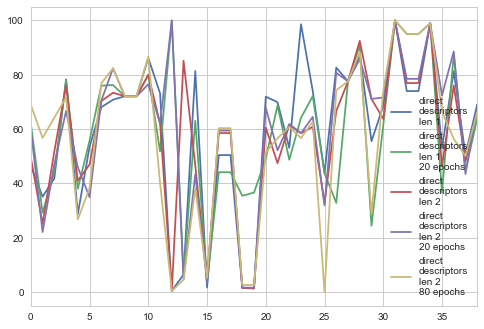

In [21]:
model_accuracies.plot()
plt.show()

In [98]:
data = pd.read_csv('./data/_sparse_chord/training_data.csv')
data.describe()

,next_has_pitch_11,next_has_pitch_12,next_has_pitch_13,next_has_pitch_14,next_has_pitch_15,next_has_pitch_16,next_has_pitch_17,next_has_pitch_18,next_has_pitch_19,next_has_pitch_20,...,string6_fret16_played,string6_fret17_played,string6_fret18_played,string6_fret19_played,string6_fret20_played,string6_fret21_played,string6_fret22_played,string6_fret23_played,string6_fret24_played,probs_1
count,257194.0,257194.0,257194.0,257194.0,257194.0,257194.000000,257194.000000,257194.0,257194.000000,257194.0,...,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000
mean,0.0,0.0,0.0,0.0,0.0,0.000023,0.000121,0.0,0.000152,0.0,...,0.000708,0.003787,0.000902,0.002675,0.001038,0.000323,0.001124,0.000019,0.000369,0.822027
std,0.0,0.0,0.0,0.0,0.0,0.004830,0.010978,0.0,0.012313,0.0,...,0.026592,0.061422,0.030021,0.051652,0.032203,0.017961,0.033502,0.004409,0.019216,0.262865
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000223
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.734043
50%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.960378
75%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
max_ = data.max()[[col for col in data.columns if col.startswith('string')]]
print(sum(max_), '/', len(max_), sum(max_) / len(max_))

150.0 / 150 1.0


In [109]:
del data